# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

### Exercise 10.1

In the first part of this exercise sheet, we again solve the travelling salesman problem, introduced in exercise sheet $9$. We use the exact same city maps, where the cities are either placed on the circumference of a unit circle or inside a square with sidelength $2$. This time, we apply a technique called **simulated annealing** to find a route that minimizes the $L^{(1)}$-norm:

$$ L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|, $$

where the $\vec{x}_i$ are one particular permutation of the cities and $\vec{x}_{N+1} = \vec{x}_{1}$ as each city has to be visited exactly once.

#### Simulated Annealing

Simulated annealing is an analogy to annealing processes in the nature, where materials minimize their energy when the temperature is lowered sufficiently slowly (e.g., think about crystallization processes). Here, we do not have a real material but we can interpret the route of the travelling salesman as the material. The energy is given by the $L^{(1)}$-norm of the route. So, in order to find the route that minimizes the $L^{(1)}$-norm we have to implement a temperature or - similarly - a parameter $\beta$. To do so, we have to find a way to propose a new route given the salesman with a certain route. We do so by performing a pair permutation (an exchange of two genes in the current route) on the route. Now, we accept the proposed route with probability:

$$\exp{(-\beta (L^{(1)}_{proposed} - L^{(1)}_{current}))},$$

if $L^{(1)}_{proposed} > L^{(1)}_{current}$. Otherwise, we accept the proposed route with certainty - i.e. with $100\,\%$. In other words, if the proposed route is shorter in terms of the $L^{(1)}$-norm, we keep it. However, for the diversification (i.e., not to get stuck in a local minimum), we still allow a worse route with a probability that decreases with decreasing temperature (or increasing $\beta$). 

We can interpret the proposal of a new route as the trial tranistion probability in the Metropolis algorithm. Then, the acceptance probability $\alpha$ is:

$$\alpha = \min \left \{1, \exp{(-\beta (L^{(1)}_{proposed} - L^{(1)}_{current}))}\right \}$$

that corresponds precisely to our probability from above.

Our implementation of simulated annealing foresees that for every value of $\beta$, $N_{sample}$ new routes (= steps of the Metropolis algorithm) are proposed. Then, the temperature is decreased starting from $\beta_{high} = 0$ ($T_{high} = \infty$) to $\beta_{low}$ ($T_{low}$) in $N_{steps}$ steps.

For this exercise sheet, we use $N_{sample} = 10^5$, $\beta_{low} = 100$ ($T_{low} = 0.01$), and $N_{steps} = 500$.

#### Cities on a Circumference

First, we apply the presented simulated annealing procedure to find a route that minimizes the $L^{(1)}$-norm for $32$ cities placed on the circumference of the unit circle. In the figure below, we compare the $L^{(1)}$-norm as a function of the temperature $\beta$ obtained from simulated annealing with the result of the $L^{(1)}$-norm of the best individual as a function of the number of generations from the genetic computation in the last exercise sheet.

We observe that both simulated annealing as well as the genetic algorithm lead to similar values of the $L^{(1)}$-norm for a low temperature, and for a large number of generations, respectively. 

L1 (sim. annealing): 6.30225
L1 (gen. algorithm): 6.23351


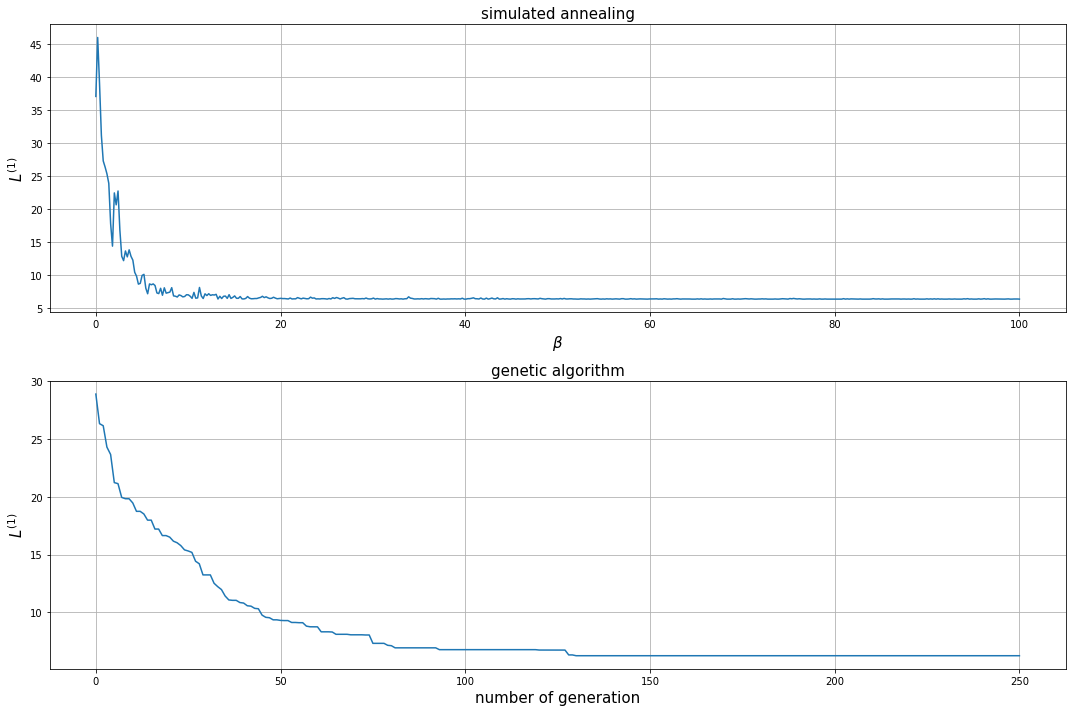

In [979]:
import numpy as np
import matplotlib.pyplot as plt

def plot_loss(path_sim, path_gen):
    """
    Plot L1 loss for simulated annealing and genetic alogrithm.
    """
    
    fig, ax = plt.subplots(2, 1, figsize=(15, 10))
    
    # simulated annealing
    beta, loss = np.loadtxt(path_sim, delimiter=",", unpack=True, skiprows=1)
    ax[0].plot(beta, loss)
    ax[0].set_xlabel(r"$\beta$", size=15)
    ax[0].set_ylabel(r"$L^{(1)}$", size=15)
    ax[0].grid()
    ax[0].set_title("simulated annealing", size=15)
    print("L1 (sim. annealing): " + str(loss[-1]))
    
    # genetic algorithm
    n_gen, loss, trash = np.loadtxt(path_gen, delimiter=",", unpack=True, skiprows=1)
    ax[1].plot(n_gen, loss)
    ax[1].set_xlabel("number of generation", size=15)
    ax[1].set_ylabel(r"$L^{(1)}$", size=15)
    ax[1].grid()
    ax[1].set_title("genetic algorithm", size=15)
    print("L1 (gen. algorithm): " + str(loss[-1]))
    
    plt.tight_layout()
    plt.show()
                                                                                                    
plot_loss("data/circle/l1_sim.txt", "data/circle/l1_gen.txt")

In fact, the corresponding routes in the 2D plane are basically the same. So, both simulated annealing as well as the genetic algorithm are able to find similar local minima of the traveling salesman problem for the given city map.

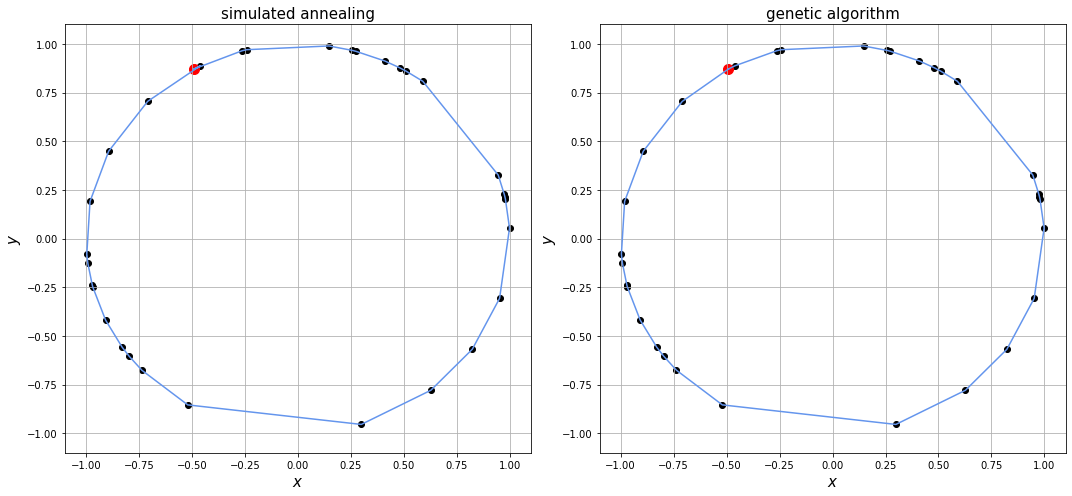

In [984]:
def plot_best(path):
    """
    Plot of best path for simulated annealing and genetic algorithm.
    """

    fig, ax = plt.subplots(1, 2, figsize=(15, 7))
    
    # simulated annealing
    x, y = np.loadtxt(path + "map.txt", unpack=True, delimiter=",", skiprows=1)
    best_path = np.loadtxt(path + "l1_path_sim.txt", delimiter=",", dtype=int)[-1]

    # insert start and end city (fixed for all individuals)
    best_path = np.insert(best_path, 0, 0, axis=0)
    best_path = np.append(best_path, 0)
    
    ax[0].scatter(x, y, marker="o", color="k")
    ax[0].scatter(x[0], y[0], marker="o", color="r", s=100)
    ax[0].plot(x[best_path], y[best_path], color="cornflowerblue")
    ax[0].set_xlabel("$x$", size=15)
    ax[0].set_ylabel("$y$", size=15)
    ax[0].set_xlim(-1.1, 1.1)
    ax[0].set_ylim(-1.1, 1.1)
    ax[0].set_title("simulated annealing", size=15)
    ax[0].grid()
    
    # genetic algorithm
    x, y = np.loadtxt(path + "map.txt", unpack=True, delimiter=",", skiprows=1)
    best_path = np.loadtxt(path + "l1_gen_path.txt", delimiter=",", dtype=int)[-1]
    
    # insert start and end city (fixed for all individuals)
    best_path = np.insert(best_path, 0, 0, axis=0)
    best_path = np.append(best_path, 0)
    
    ax[1].scatter(x, y, marker="o", color="k")
    ax[1].scatter(x[0], y[0], marker="o", color="r", s=100)
    ax[1].plot(x[best_path], y[best_path], color="cornflowerblue")
    ax[1].set_xlabel("$x$", size=15)
    ax[1].set_ylabel("$y$", size=15)
    ax[1].set_xlim(-1.1, 1.1)
    ax[1].set_ylim(-1.1, 1.1)
    ax[1].set_title("genetic algorithm", size=15)
    ax[1].grid()
    
    plt.tight_layout()
    plt.show()
    
plot_best("data/circle/")

#### Cities inside a Square

In the next figure, we show the same comparison as above for the $32$ cities placed inside a square with sidelength $2$. Again, both approaches lead to similar local minima of the $L^{(1)}$-norm.

L1 (sim. annealing): 10.6313
L1 (gen. algorithm): 11.0257


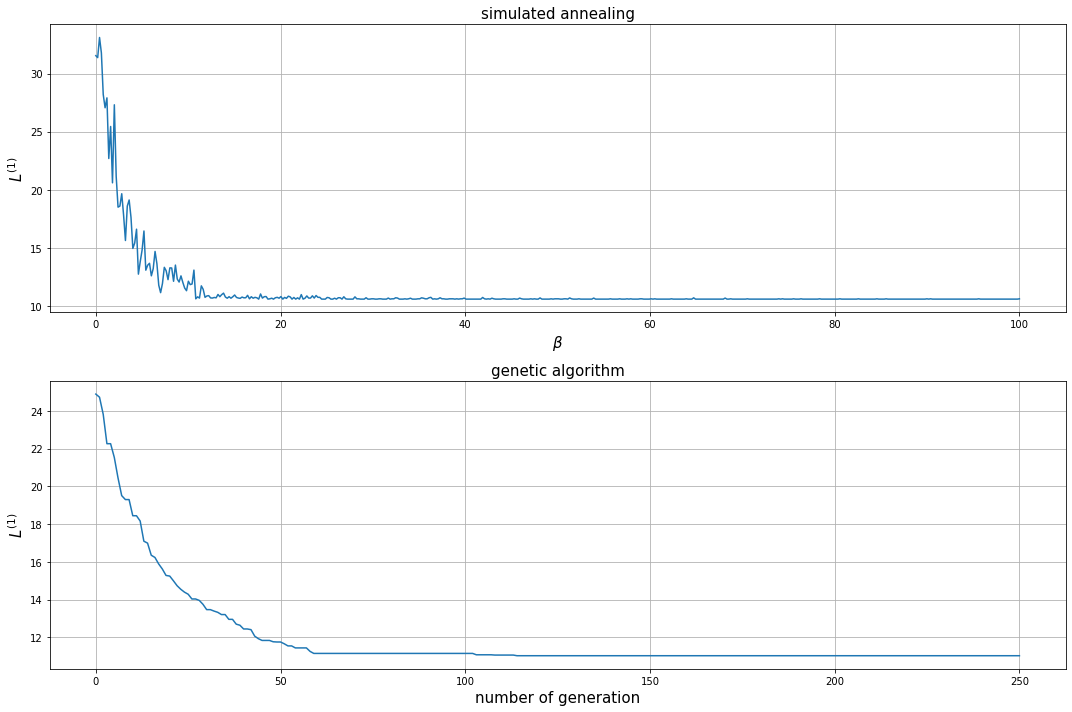

In [982]:
plot_loss("data/square/l1_sim.txt", "data/square/l1_gen.txt")

The figure below demonstrates that the routes found by simulated annealing differ from the result of the genetic algorithm. However, both seem to be sufficiently small local minima of the travelling salesman problem (especially since the routes do not have crossing).

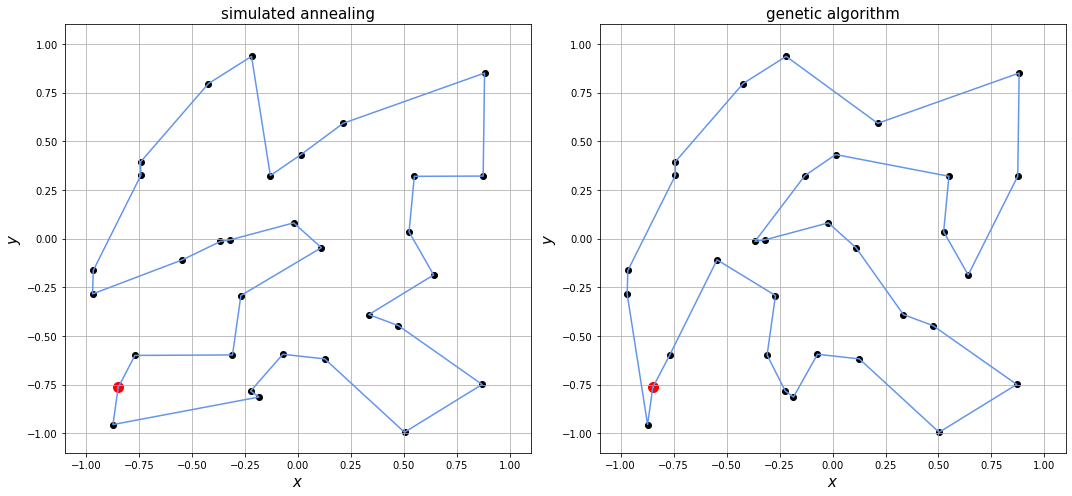

In [975]:
plot_best("data/square/")

### Exercise 10.2

A way to increase the efficiency and the precision of the genetic algorithm is the application of parallel computing using the MPI library. In particular, we use the $4$ cores of our CPU to perform $4$ independent genetic searches. The $4$ corresponding populations are called *continents*. After each $N_{migr}$ generations, two random continents are selected, and the $N_{exchange}$ best individuals of both populations are exchanged.

#### 4 Nodes without Migration Processes

First, let us have a look at the $4$ populations, when there are no migration processes implemented. We use populations with $500$ individuals on each continent and compute a total of $250$ generations. Below, we plot the $L^{(1)}$-norm of the best individual for this case as a function of the number of generations for each node. We observe that each node finds a slightly different minimum of the $L^{(1)}$-norm. This is not surprising as the sequence of the random number generator is different on each CPU (otherwise we would not have independent populations).

L1_min (node=0): 9.78776
L1_min (node=1): 9.71546
L1_min (node=2): 10.6133
L1_min (node=3): 9.37425


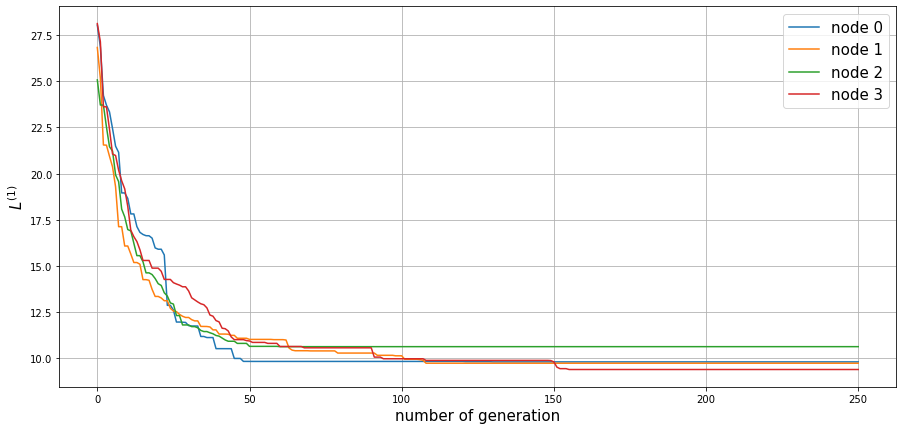

In [995]:
def plot_continent_loss(path_list, label_list):
    
    plt.figure(figsize=(15, 7))
    
    for i, path in enumerate(path_list):
        ngen, loss_best, loss_mean = np.loadtxt(path, delimiter=",", unpack=True, skiprows=1)
        plt.plot(ngen, loss_best, label=label_list[i])
        print("L1_min (node=" + str(i) + "): " + str(loss_best[-1]))
    
    plt.xlabel("number of generation", size=15)
    plt.ylabel(r"$L^{(1)}$", size=15)
    plt.legend(fontsize=15)
    plt.grid()
    plt.show()
    
path_list = ["data/non_parallel/l1_rank=0.txt",
             "data/non_parallel/l1_rank=1.txt", 
             "data/non_parallel/l1_rank=2.txt", 
             "data/non_parallel/l1_rank=3.txt"]
label_list = ["node 0", 
              "node 1", 
              "node 2", 
              "node 3"]
plot_continent_loss(path_list, label_list)

We can also take a look at the corresponding routes of the best paths after $250$ generations. The routes of the $4$ nodes look similar. However, node $0$ and node $2$ have obvious crossing in their paths of the travelling salesman, such that they can still be improved.

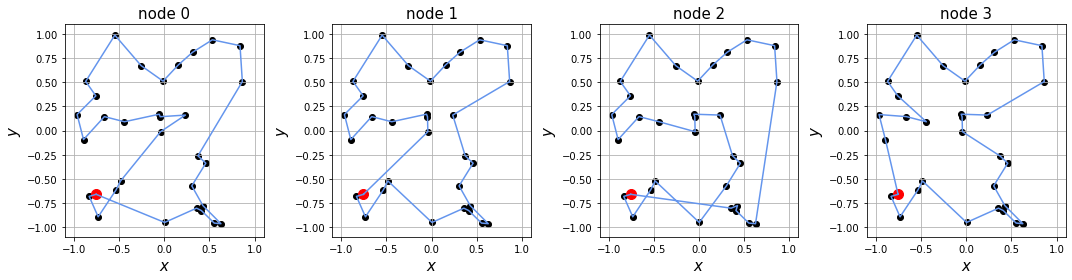

In [993]:
def plot_continent_path(path_list, title_list):
    
    fig, ax = plt.subplots(1, len(path_list), figsize=(15, 4))
    
    for i, path in enumerate(path_list):
           
        x, y = np.loadtxt("data/parallel/map.txt", unpack=True, delimiter=",", skiprows=1)
        best_path = np.loadtxt(path, delimiter=",", dtype=int)[-1]

        # insert start and end city (fixed for all individuals)
        best_path = np.insert(best_path, 0, 0, axis=0)
        best_path = np.append(best_path, 0)

        ax[i].scatter(x, y, marker="o", color="k")
        ax[i].scatter(x[0], y[0], marker="o", color="r", s=100)
        ax[i].plot(x[best_path], y[best_path], color="cornflowerblue")
        ax[i].set_xlabel("$x$", size=15)
        ax[i].set_ylabel("$y$", size=15)
        ax[i].set_xlim(-1.1, 1.1)
        ax[i].set_ylim(-1.1, 1.1)
        ax[i].set_title(title_list[i], size=15)
        ax[i].grid()

    plt.tight_layout()
    plt.show()
        
path_list = ["data/non_parallel/l1_path_rank=0.txt",
             "data/non_parallel/l1_path_rank=1.txt", 
             "data/non_parallel/l1_path_rank=2.txt", 
             "data/non_parallel/l1_path_rank=3.txt"]

plot_continent_path(path_list, label_list)

#### 4 Nodes with Migration Processes

To find these improvements, we implement the above described migration processes between the $4$ populations. Again, each continent consists of a population of $500$ individuals, and we compute a total of $250$ generations. A migration process is applied every $N_{migr}=10$ generations, while $N_{exchange}$ is a random number between $1$ and $5$, such that the number of exchanged individuals $N_{exchange}$ is different for every migration process. 

Again, we plot the $L^{(1)}$-norm of the best route for each node against the number of generations. Clearly, the $L^{(1)}$-norm converges faster, and all nodes lead to the same local minimum of the $L^{(1)}$-norm.

L1_min (node=0): 9.29795
L1_min (node=1): 9.29795
L1_min (node=2): 9.29795
L1_min (node=3): 9.29795


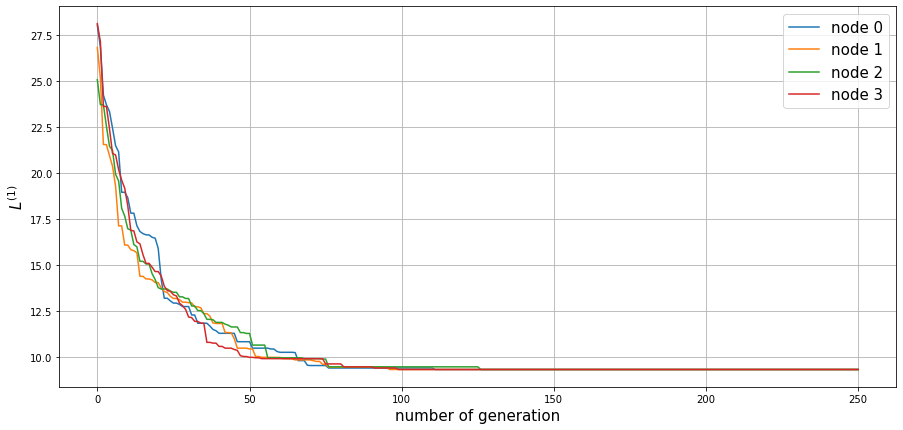

In [996]:
path_list = ["data/parallel/l1_rank=0.txt",
             "data/parallel/l1_rank=1.txt", 
             "data/parallel/l1_rank=2.txt", 
             "data/parallel/l1_rank=3.txt"]
label_list = ["node 0", 
              "node 1", 
              "node 2", 
              "node 3"]
plot_continent_loss(path_list, label_list)

This impression is enforced, when we take a look at the best routes for each of the $4$ nodes. As we can see, there are no more crossings in the route of the travelling salesman. Our solutions have clearly improved, without using more generations. Thus, we conclude that in the case of genetic algorithms parallel computing leads indeed to a higher efficiency, and a higher precision.

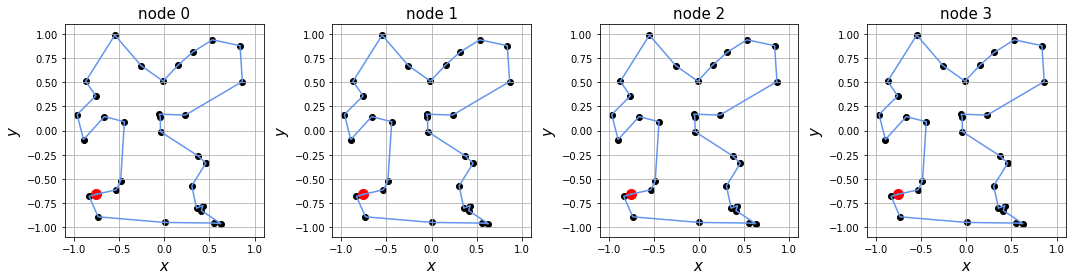

In [994]:
path_list = ["data/parallel/l1_path_rank=0.txt",
             "data/parallel/l1_path_rank=1.txt", 
             "data/parallel/l1_path_rank=2.txt", 
             "data/parallel/l1_path_rank=3.txt"]

plot_continent_path(path_list, label_list)